# Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install waterfallcharts
!pip install fast_ml
!pip install mlxtend

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=6aeae56b5020a61700227ae6a11fa5e3517da7a037fab8ca49a9d883cfef1c97
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts
     |████████████████████████████████| 42 kB 380 kB/s 


# Import Library

In [7]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.feature_selection import RFE                      
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import sklearn.datasets as skd
import sklearn.ensemble as ske
import waterfall_chart


## Membaca data dari Google Drive

In [8]:
# membaca data .csv untuk dilakukan preparation
df=pd.read_csv('/content/drive/MyDrive/Riset/DataFileClean_ready.csv') 
display(df.head)

<bound method NDFrame.head of      DPN      P0    Q0     V0   MA    RHO      T0     RE   ALFA  BETA      CL  \
0    200  100412  2817  70.08  0.2  1.147  301.75  1.514  -9.86   0.0  0.2054   
1    201  100406  2815  70.07  0.2  1.147  301.85  1.512  -8.72   0.0  0.3990   
2    202  100402  2814  70.07  0.2  1.146  301.95  1.511  -7.53   0.0  0.6695   
3    203  100399  2814  70.08  0.2  1.146  302.02  1.511  -6.44   0.0  0.7976   
4    204  100401  2811  70.06  0.2  1.146  302.12  1.510  -5.37   0.0  0.9071   
..   ...     ...   ...    ...  ...    ...     ...    ...    ...   ...     ...   
187  161  100282  2799  70.01  0.2  1.142  302.66  1.502  15.52   0.0  2.1714   
188  162  100299  2804  70.06  0.2  1.142  302.69  1.503  16.54   0.0  2.1053   
189  163  100304  2798  70.00  0.2  1.142  302.72  1.502  17.47   0.0  2.1095   
190  164  100316  2799  70.01  0.2  1.142  302.75  1.502  18.35   0.0  1.9715   
191  165  100323  2795  69.96  0.2  1.142  302.78  1.500  19.38   0.0  1.9620  

In [9]:
display(df)

,DPN,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,200,100412,2817,70.08,0.2,1.147,301.75,1.514,-9.86,0.0,0.2054,0.1227,-0.2911,-0.0046,-0.0390,0.0084
1,201,100406,2815,70.07,0.2,1.147,301.85,1.512,-8.72,0.0,0.3990,0.1126,-0.3324,-0.0022,-0.0276,0.0079
2,202,100402,2814,70.07,0.2,1.146,301.95,1.511,-7.53,0.0,0.6695,0.1005,-0.3817,-0.0005,0.0002,0.0059
3,203,100399,2814,70.08,0.2,1.146,302.02,1.511,-6.44,0.0,0.7976,0.1039,-0.3783,-0.0001,0.0026,0.0055
4,204,100401,2811,70.06,0.2,1.146,302.12,1.510,-5.37,0.0,0.9071,0.1098,-0.3721,0.0001,0.0043,0.0053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,161,100282,2799,70.01,0.2,1.142,302.66,1.502,15.52,0.0,2.1714,0.2305,-0.2405,-0.0009,0.0051,-0.0053
188,162,100299,2804,70.06,0.2,1.142,302.69,1.503,16.54,0.0,2.1053,0.2901,-0.2915,-0.0007,-0.0071,-0.0203
189,163,100304,2798,70.00,0.2,1.142,302.72,1.502,17.47,0.0,2.1095,0.3193,-0.3124,-0.0009,-0.0097,-0.0244
190,164,100316,2799,70.01,0.2,1.142,302.75,1.502,18.35,0.0,1.9715,0.3445,-0.2882,0.0005,0.0223,-0.0046


# Data Cleaning

# Remove DPN dan Deteksi Missing Value
missing value : data-data yang tidak terdeteksi/tidak ada data(kosong)

In [10]:
#Drop kolom DPN karena merupakan counter 
df = df.drop(['DPN'], axis = 1)
# Deteksi Adanya Missing Value
print('Status Missing Values :',df.isna().values.any())
print(df.isna().sum().sort_values(ascending=False))

Status Missing Values : False
P0       0
Q0       0
V0       0
MA       0
RHO      0
T0       0
RE       0
ALFA     0
BETA     0
CL       0
CD       0
CM25     0
CYAW     0
CROLL    0
CY       0
dtype: int64


Cek Duplicated value 

In [11]:
df[df.duplicated()]

,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY


# Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. 
Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

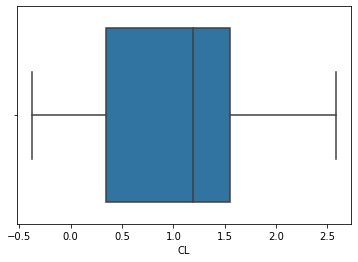

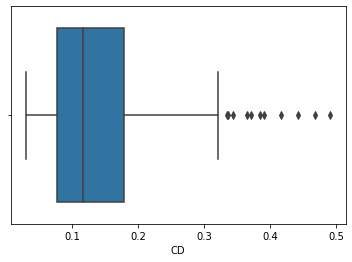

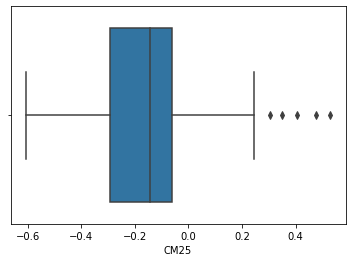

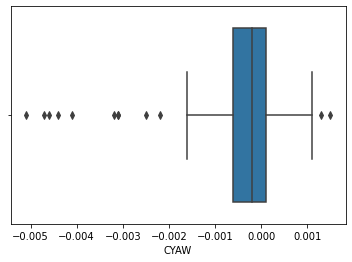

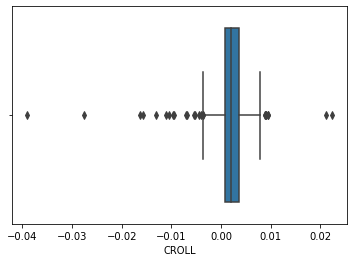

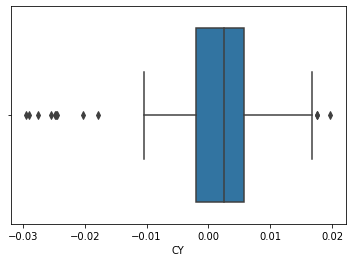

In [ ]:
# Deteksi adanya Outlier Output dengan metode (Boxplot)

plt.figure()
sns.boxplot(x=df['CL'])
plt.show()
sns.boxplot(x=df['CD'])
plt.show()
sns.boxplot(x=df['CM25'])
plt.show()
sns.boxplot(x=df['CYAW'])
plt.show()
sns.boxplot(x=df['CROLL'])
plt.show()
sns.boxplot(x=df['CY'])
plt.show()

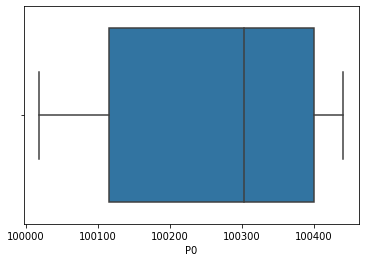

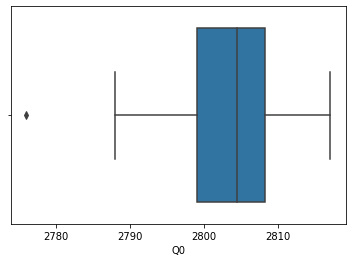

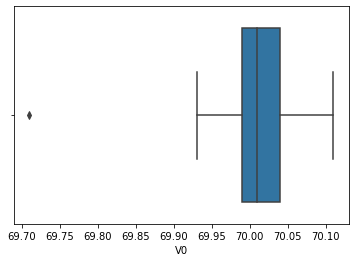

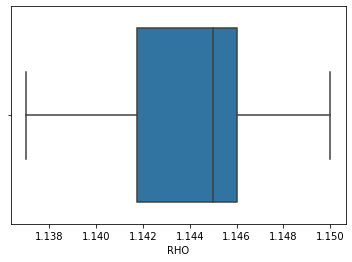

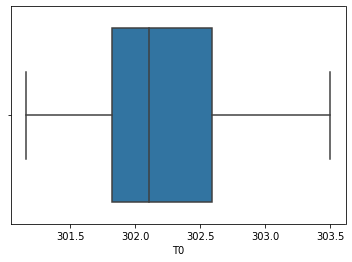

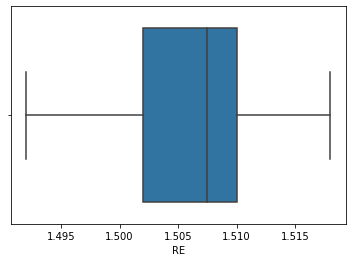

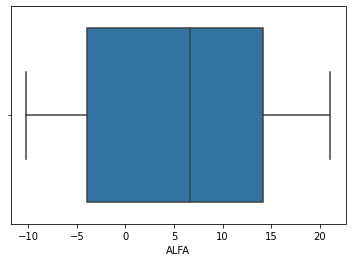

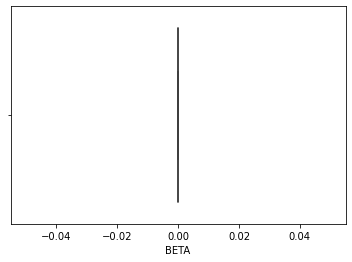

In [ ]:
# Deteksi adanya Outlierinput dengan metode (Boxplot)

plt.figure()
sns.boxplot(x=df['P0'])
plt.show()
sns.boxplot(x=df['Q0'])
plt.show()
sns.boxplot(x=df['V0'])
plt.show()
sns.boxplot(x=df['RHO'])
plt.show()
sns.boxplot(x=df['T0'])
plt.show()
sns.boxplot(x=df['RE'])
plt.show()
sns.boxplot(x=df['ALFA'])
plt.show()
sns.boxplot(x=df['BETA'])
plt.show()

# Mengatasi Outlier
Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). 

In [12]:
# Handling Output Outlier with IQR
Q1 = (df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA', 'CL','CD','CM25','CYAW','CROLL','CY']]).quantile(0.25)
Q3 = (df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA', 'CL','CD','CM25','CYAW','CROLL','CY']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data Output setelah ditangani Outlier: ')
print(df[['P0','Q0','V0','MA','RHO','T0','RE','ALFA','CL','CD','CM25','CYAW','CROLL','CY']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
P0       100826.750000
Q0         2822.125000
V0           70.115000
MA            0.200000
RHO           1.152375
T0          303.751250
RE            1.522000
ALFA         41.465000
CL            3.369050
CD            0.332313
CM25          0.279113
CYAW          0.001150
CROLL         0.008088
CY            0.017350
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
P0       99688.750000
Q0        2785.125000
V0          69.915000
MA           0.200000
RHO          1.135375
T0         300.661250
RE           1.490000
ALFA       -31.295000
CL          -1.475350
CD          -0.075987
CM25        -0.633387
CYAW        -0.001650
CROLL       -0.003612
CY          -0.013650
dtype: float64

Persebaran data Output setelah ditangani Outlier: 
                  P0           Q0          V0            MA         RHO  \
count     192.000000   192.000000  192.000000  1.920000e+02  192.000000   
mean   100274.031250  2803.703776  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


CEK KEMBALI KEBERADAAN OUTLIER

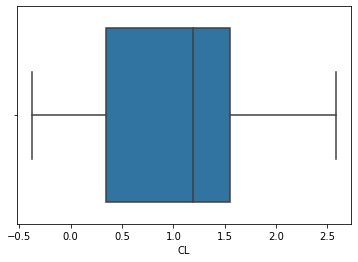

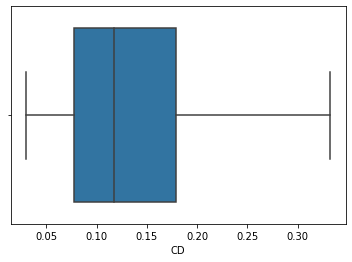

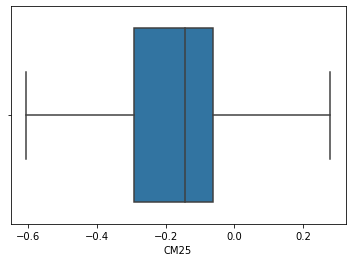

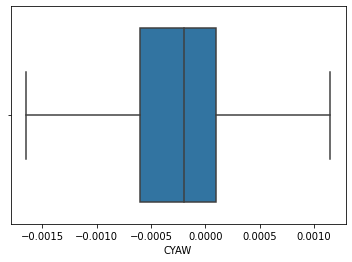

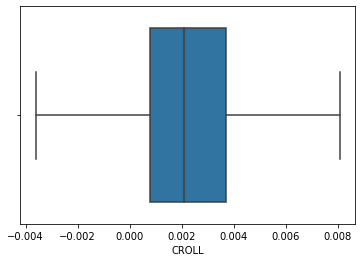

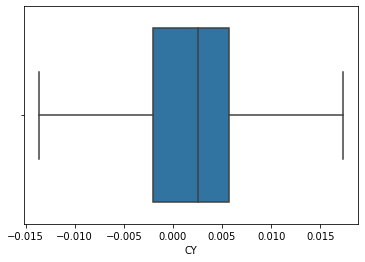

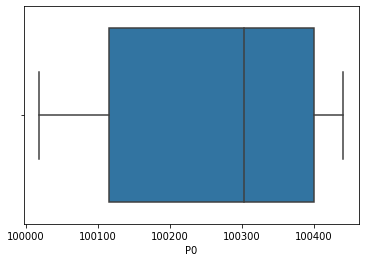

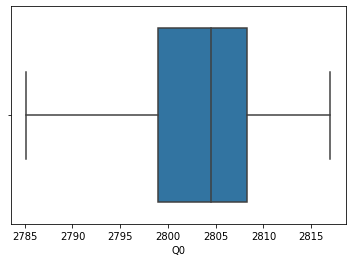

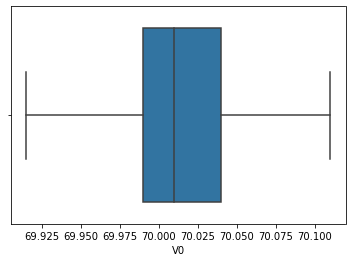

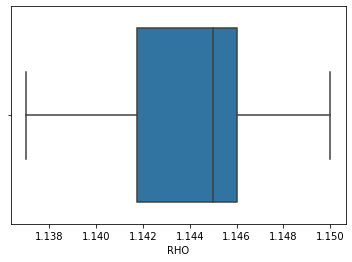

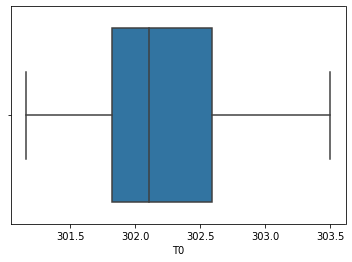

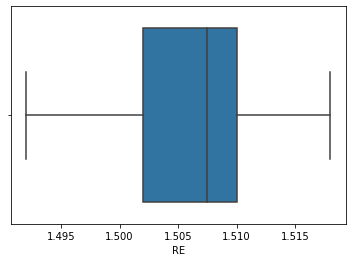

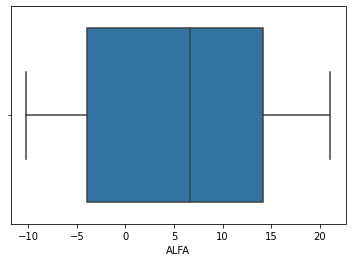

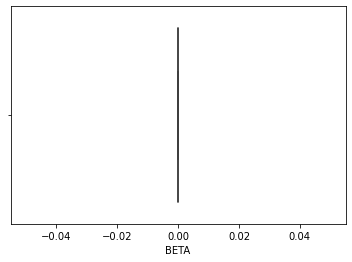

In [ ]:
# Deteksi adanya Outlier output dengan metode (Boxplot) setelah metode IQR

plt.figure()
sns.boxplot(x=df['CL'])
plt.show()
sns.boxplot(x=df['CD'])
plt.show()
sns.boxplot(x=df['CM25'])
plt.show()
sns.boxplot(x=df['CYAW'])
plt.show()
sns.boxplot(x=df['CROLL'])
plt.show()
sns.boxplot(x=df['CY'])
plt.figure()
sns.boxplot(x=df['P0'])
plt.show()
sns.boxplot(x=df['Q0'])
plt.show()
sns.boxplot(x=df['V0'])
plt.show()
sns.boxplot(x=df['RHO'])
plt.show()
sns.boxplot(x=df['T0'])
plt.show()
sns.boxplot(x=df['RE'])
plt.show()
sns.boxplot(x=df['ALFA'])
plt.show()
sns.boxplot(x=df['BETA'])
plt.show()

# Normalisasi Data

In [13]:
#Normalisasi Data Total
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
df_minmax = pd.DataFrame(df_scaled)
df_minmax.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/df_minmax.csv', index=False, header=True)

## Describe Data set

In [14]:
df_minmax.describe() # deskripsi data

,P0,Q0,V0,MA,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
count,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.605275,0.582864,0.506811,0.0,0.532452,0.444578,0.542668,0.500942,0.0,0.476446,0.358041,0.492152,0.493862,0.473241,0.504402
std,0.323477,0.223359,0.179463,0.0,0.248283,0.235208,0.228589,0.314132,0.0,0.272926,0.268570,0.175576,0.206434,0.251796,0.196834
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230496,0.435294,0.384615,0.0,0.365385,0.282051,0.384615,0.199107,0.0,0.243158,0.156719,0.356243,0.375000,0.375000,0.375000
50%,0.672577,0.607843,0.487179,0.0,0.615385,0.403846,0.596154,0.538609,0.0,0.529762,0.288488,0.521609,0.517857,0.488248,0.522581
75%,0.903073,0.725490,0.641026,0.0,0.692308,0.612179,0.692308,0.779515,0.0,0.651831,0.494031,0.613746,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_minmax.shape # bentuk/dimensi dataset (baris,kolom)

(192, 15)

In [16]:
df_minmax.columns # daftar nama kolom

Index(['P0', 'Q0', 'V0', 'MA', 'RHO', 'T0', 'RE', 'ALFA', 'BETA', 'CL', 'CD',
       'CM25', 'CYAW', 'CROLL', 'CY'],
      dtype='object')

In [17]:
df_minmax.dtypes # tipe data untuk tiap kolom

P0       float64
Q0       float64
V0       float64
MA       float64
RHO      float64
T0       float64
RE       float64
ALFA     float64
BETA     float64
CL       float64
CD       float64
CM25     float64
CYAW     float64
CROLL    float64
CY       float64
dtype: object

In [18]:
df_minmax.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P0      192 non-null    float64
 1   Q0      192 non-null    float64
 2   V0      192 non-null    float64
 3   MA      192 non-null    float64
 4   RHO     192 non-null    float64
 5   T0      192 non-null    float64
 6   RE      192 non-null    float64
 7   ALFA    192 non-null    float64
 8   BETA    192 non-null    float64
 9   CL      192 non-null    float64
 10  CD      192 non-null    float64
 11  CM25    192 non-null    float64
 12  CYAW    192 non-null    float64
 13  CROLL   192 non-null    float64
 14  CY      192 non-null    float64
dtypes: float64(15)
memory usage: 22.6 KB


## Cleaning data hasil normalisasi

In [19]:
#Drop konstan zero variables
df_minmax.drop(["MA","BETA"], axis = 1, inplace = True)

# Deteksi Adanya Missing Value
print('Status Missing Values :',df_minmax.isna().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_minmax.isna().sum().sort_values(ascending=False))

Status Missing Values : False

Jumlah Missing Values masing-masing kolom, adalah:
P0       0
Q0       0
V0       0
RHO      0
T0       0
RE       0
ALFA     0
CL       0
CD       0
CM25     0
CYAW     0
CROLL    0
CY       0
dtype: int64


## Display Data hasil Normalisasi Minmax

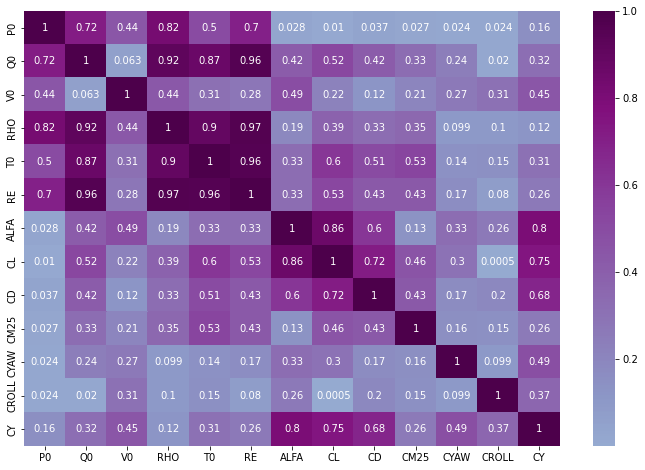

In [20]:
# Data Correlation Analysis
pd.options.display.float_format = '{:,.2f}'.format
cor = df_minmax.corr()
plt.figure(figsize=(12,8))
sns.heatmap(abs(cor), annot=True, cmap = 'BuPu', center=0.117)
plt.show()

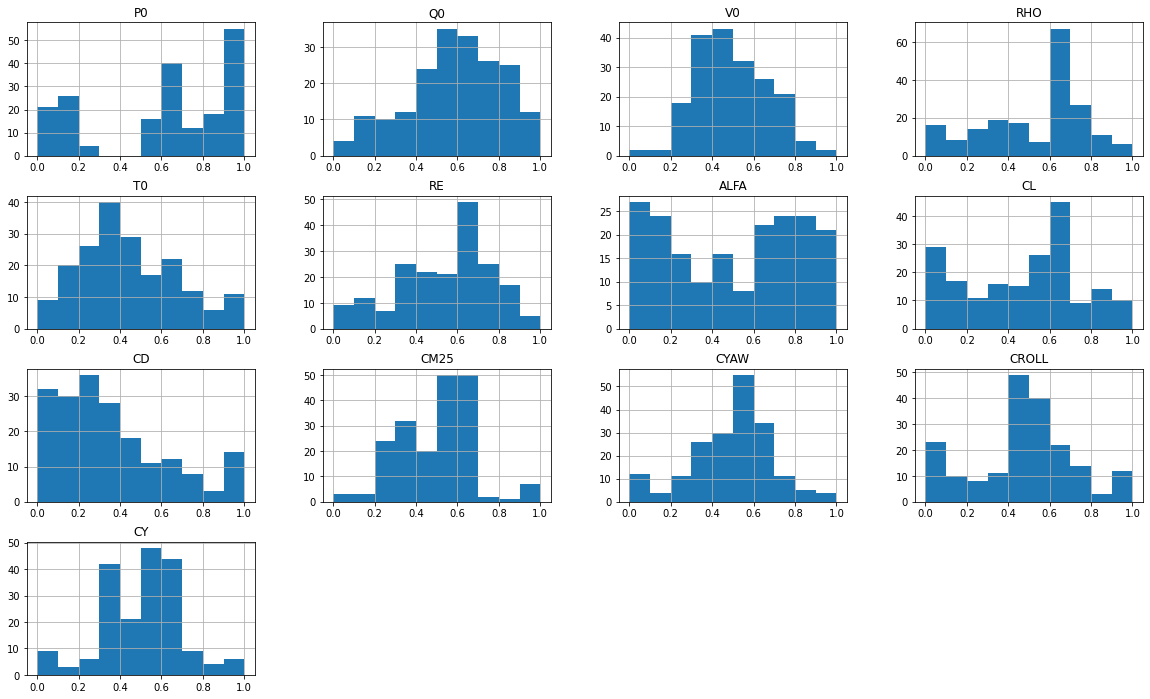

In [21]:
# Data histogram analysis
df_minmax.hist(figsize=(20,12))
plt.show()

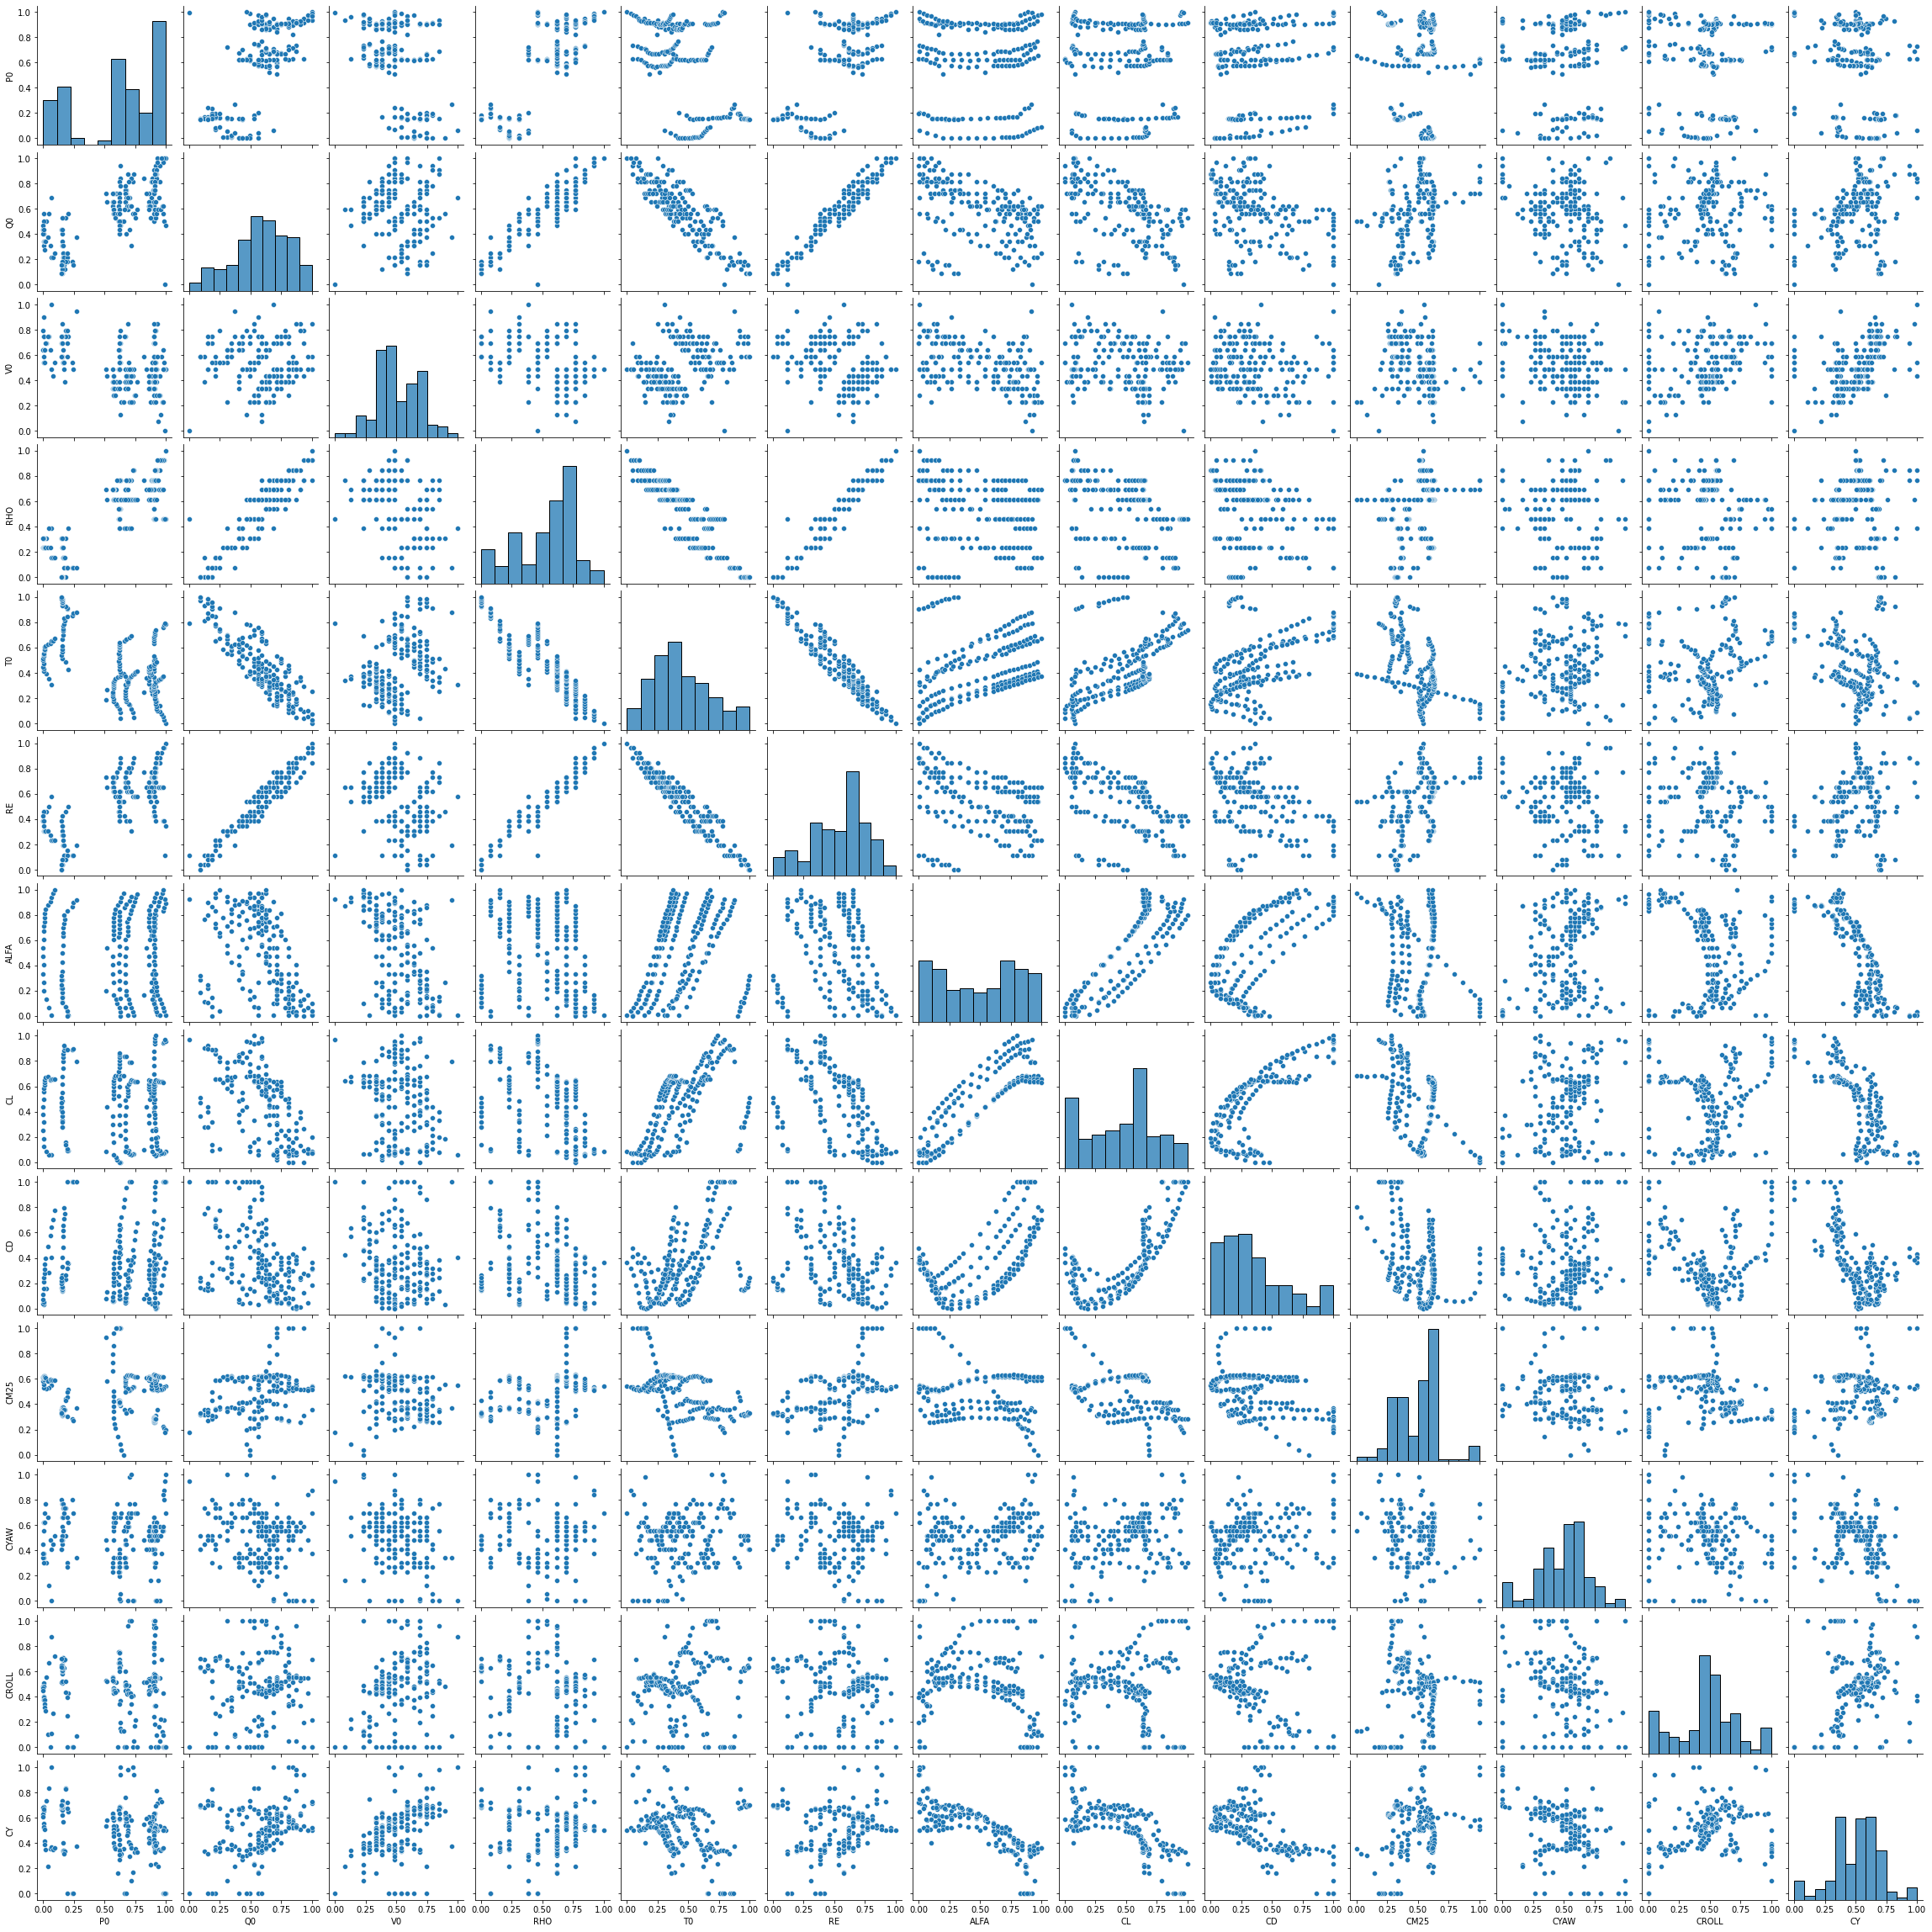

In [ ]:
#PairPlot Analysis
sns.pairplot(df_minmax)

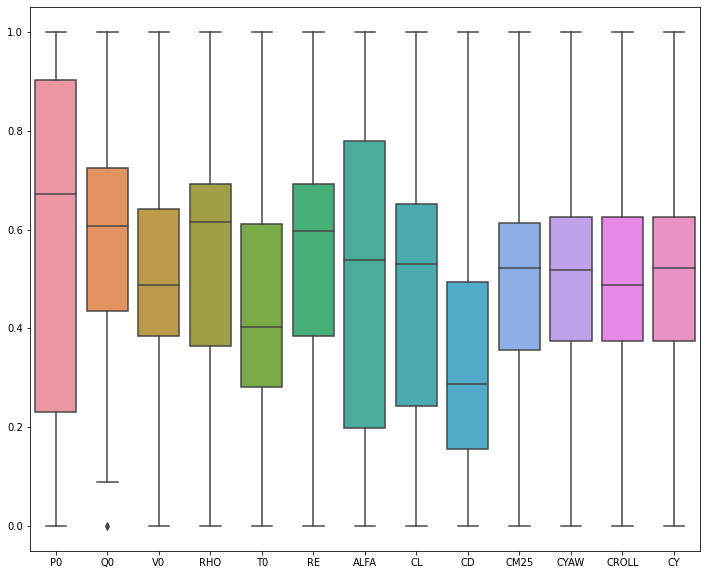

In [22]:
#BoxPlot Analysis
plt.figure(figsize=(12,10))
sns.boxplot(data=df_minmax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


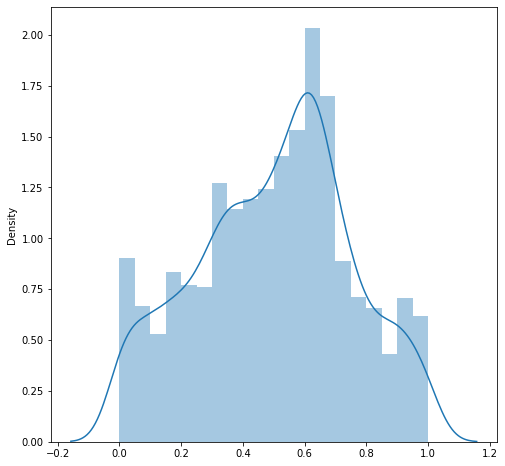

In [23]:
plt.figure(figsize = (8,8))
sns.distplot(df_minmax)

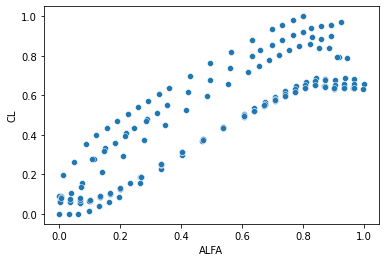

In [24]:
ax = sns.scatterplot(x='ALFA', y=('CL'), data=df_minmax)

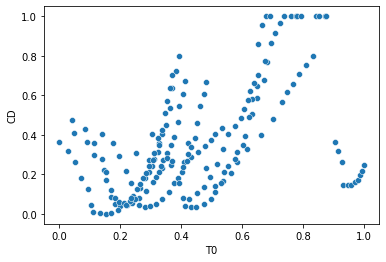

In [25]:
ax = sns.scatterplot(x='T0', y=('CD'), data=df_minmax, cmap='rainbow')

# Contoh Command Menentukan data inputan dan Output

In [ ]:
# Menentukan data inputan
dfx = df_minmax.drop(['CL','CD','CM25','CYAW','CROLL','CY'], axis = 1)
dfx.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/dfx_minmax.csv', index=False, header=True)
display(dfx)

In [ ]:
# Menentukan data output atau target
dfy = df_minmax.drop(columns=['P0','Q0','V0','RHO','T0','RE','ALFA'])
dfy.to_csv('/content/drive/MyDrive/Riset/Data_Preparation/dfy_minmax.csv', index=False, header=True)
display(dfy)

## FEATURE SELECTION 

## 1. Filter Methode (Pearson correlation coefficient)

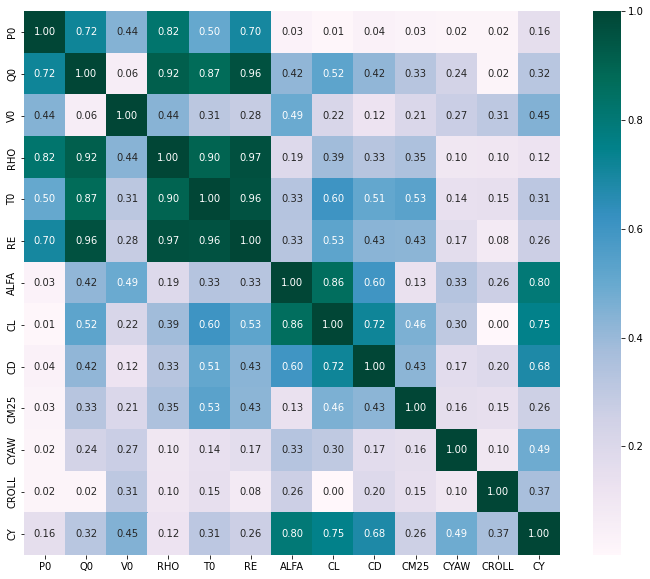

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_minmax.corr()
sns.heatmap(abs(cor), cmap='PuBuGn' ,annot=True, fmt=".2f")
plt.show()

**Cek Korelasi antara output dengan inputnya **

In [26]:
def correlation_feat(df, threshold=0.75):
    """Returns features that are correlated.
    (Set of all the names of correlated columns)
    
    Param:
    ------
    df: Pandas DataFrame
    threshold: float. Default, 0.75
        threshold for the correlation
    """
    feature_corr = set()  
    corr_matrix = df
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # absolute coeff value
            if abs(corr_matrix.iloc[i, j]
                   ) > threshold:  
                # getting the name of column
                colname = corr_matrix.columns[i]  
                feature_corr.add(colname)
    return feature_corr

correlation_feat(df_minmax.corr(), threshold=0.75)

{'CL', 'CY', 'RE', 'RHO', 'T0'}

In [27]:
#Correlation with output variable ex. CL
cor_target = abs(cor["CL"])
#Selecting highly correlated features
relevant_features_CL = cor_target[cor_target>0.5]
relevant_features_CL

Q0     0.52
T0     0.60
RE     0.53
ALFA   0.86
CL     1.00
CD     0.72
CY     0.75
Name: CL, dtype: float64

Cek Korelasi yang Kuat antara Input dan Output

In [28]:
#Tabel Korelasi terkuat Input Output 
tabel = abs(cor)
tabel.drop(["CL","CD","CM25","CYAW","CROLL","CY"], inplace = True)
tabel.drop(["ALFA","Q0","RE","P0","V0","RHO","T0"], axis=1, inplace = True)
print(tabel)

       CL   CD  CM25  CYAW  CROLL   CY
P0   0.01 0.04  0.03  0.02   0.02 0.16
Q0   0.52 0.42  0.33  0.24   0.02 0.32
V0   0.22 0.12  0.21  0.27   0.31 0.45
RHO  0.39 0.33  0.35  0.10   0.10 0.12
T0   0.60 0.51  0.53  0.14   0.15 0.31
RE   0.53 0.43  0.43  0.17   0.08 0.26
ALFA 0.86 0.60  0.13  0.33   0.26 0.80


# Contoh Code memisahkan data hanya train dan test

In [ ]:
# memisahkan data untuk train dan test dari data Normalisasi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=None, shuffle=False)

In [ ]:
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

### Contoh Code memisahkan data Train, Validation dan test

In [ ]:
# memisahkan data untuk training, validation dan testing dari data Normalisasi Untuk target CL
from fast_ml.model_development import train_valid_test_split
df_test = df_minmax.drop(['CD','CM25','CYAW','CROLL','CY'], axis = 1)
X_train2, y_train2, X_valid, y_valid, X_test2, y_test2 = train_valid_test_split(df_test, target='CL', train_size=0.8, valid_size=0.1, test_size=0.1)

In [ ]:
print('training dataset')
print(X_train2.shape)
print(y_train2.shape)
print('testing dataset:')
print(X_test2.shape)
print(y_test2.shape)
print('validation dataset:')
print(X_valid.shape)
print(y_valid.shape)

# Code memisahkan data training dan testing untuk target

In [29]:
# memisahkan data untuk training dan testing dari data Normalisasi Untuk masing2 target 
X = df_minmax.drop(columns=['CL', 'CD', 'CM25', 'CYAW', 'CROLL', 'CY'])   #Feature Matrix
a = df_minmax['CL']          #Target Variable
b = df_minmax['CD']          #Target Variable
c = df_minmax['CM25']          #Target Variable
d = df_minmax['CYAW']          #Target Variable
e = df_minmax['CROLL']          #Target Variable
f = df_minmax['CY']          #Target Variable
X

,P0,Q0,V0,RHO,T0,RE,ALFA
0,0.93,1.00,0.85,0.77,0.25,0.85,0.01
1,0.92,0.94,0.79,0.77,0.29,0.77,0.05
2,0.91,0.91,0.79,0.69,0.34,0.73,0.09
3,0.90,0.91,0.85,0.69,0.37,0.73,0.12
4,0.91,0.81,0.74,0.69,0.41,0.69,0.16
...,...,...,...,...,...,...,...
187,0.62,0.44,0.49,0.38,0.64,0.38,0.82
188,0.66,0.59,0.74,0.38,0.65,0.42,0.85
189,0.68,0.40,0.44,0.38,0.67,0.38,0.88
190,0.70,0.44,0.49,0.38,0.68,0.38,0.91


# Using a random forest to select important features for regression

In [30]:
reg = ske.RandomForestRegressor()

In [31]:
reg.fit(X, a)

RandomForestRegressor()

In [32]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

Text(0.5, 1.0, 'Features importance')

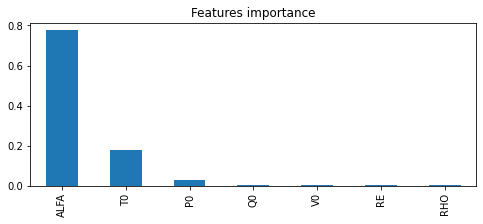

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
feature_name = X.columns.values
labels = feature_name[fet_ind]
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

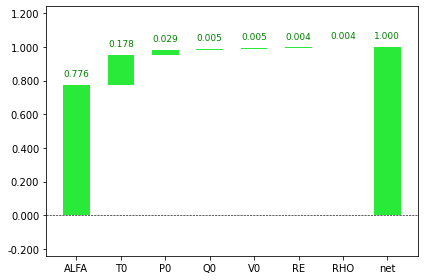

In [34]:
waterfall_chart.plot(labels,fet_imp, sorted_value=True,rotation_value=0,formatting='{:,.3f}')

In [35]:
reg.fit(X, b)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'T0', 'P0', 'RE', 'V0', 'RHO', 'Q0'], dtype=object)

In [36]:
reg.fit(X, c)  #Output CM25
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['P0', 'T0', 'RHO', 'ALFA', 'V0', 'RE', 'Q0'], dtype=object)

Text(0.5, 1.0, 'Features importance')

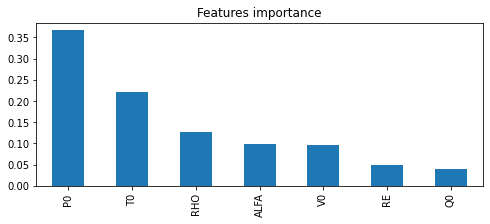

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
feature_name = X.columns.values
labels = feature_name[fet_ind]
pd.Series(fet_imp, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

In [38]:
reg.fit(X, d)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
labelsfeature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'P0', 'T0', 'RHO', 'RE', 'V0', 'Q0'], dtype=object)

In [39]:
reg.fit(X, e)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'T0', 'P0', 'Q0', 'V0', 'RHO', 'RE'], dtype=object)

In [40]:
reg.fit(X, f)
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]
feature_name = X.columns.values
labels = feature_name[fet_ind]
labels

array(['ALFA', 'T0', 'P0', 'V0', 'Q0', 'RHO', 'RE'], dtype=object)

### Sequential Feature Selection Algorithms

# Sequential forward selection(SFS) 

In SFS variant features are sequentially added to an empty set of features until the addition of extra features does not reduce the criterion.

Mathematically if the input data in the algorithm is 
image.png

Then the output will be : 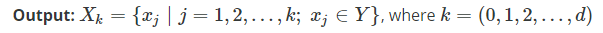


Where the selected features are k and K<d.

In the initialization X is a null set and k=0 (where k is the size of the subset).

In the termination, the size is k = p where p is the number of desired features.

In [41]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [42]:
forward_selection(X, a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['ALFA', 'T0', 'Q0', 'RHO']

In [43]:
forward_selection(X, b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['ALFA', 'T0', 'P0', 'RHO']

In [44]:
forward_selection(X, c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['T0', 'RE']

In [45]:
forward_selection(X, d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['ALFA']

In [46]:
forward_selection(X, e)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['V0']

In [47]:
forward_selection(X, f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['ALFA', 'P0', 'Q0']

## SFS dengan fungsi built in Python

In [48]:
#importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [49]:
sfs.fit(X, a)
sfs.k_feature_names_  

('Q0', 'RHO', 'T0', 'ALFA')

In [50]:
sfs.fit(X, b)
sfs.k_feature_names_  

('P0', 'RHO', 'T0', 'ALFA')

In [51]:
sfs.fit(X, c)
sfs.k_feature_names_  

('V0', 'RHO', 'T0', 'RE')

In [52]:
sfs.fit(X, d)
sfs.k_feature_names_  

('Q0', 'V0', 'RHO', 'ALFA')

In [53]:
sfs.fit(X, e)
sfs.k_feature_names_  

('Q0', 'V0', 'T0', 'ALFA')

In [54]:
sfs.fit(X, f)
sfs.k_feature_names_  

('P0', 'Q0', 'V0', 'ALFA')

# Sequential Backward Selection (SBS)

In [55]:
def backward_elimination(data, target,significance_level = 0.1):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [56]:
backward_elimination(X, a)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['V0', 'RHO', 'T0', 'ALFA']

In [57]:
backward_elimination(X, b)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['P0', 'Q0', 'V0', 'RHO', 'T0', 'ALFA']

In [58]:
backward_elimination(X, c)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['V0', 'RHO', 'T0']

In [59]:
backward_elimination(X, d)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['P0', 'Q0', 'T0', 'ALFA']

In [60]:
backward_elimination(X, e)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['P0', 'Q0', 'V0', 'T0', 'ALFA']

In [61]:
backward_elimination(X, f)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['P0', 'Q0', 'ALFA']

## SBS with built in function Python

In [62]:
X1 = np.array(X)
sbs = SFS(LinearRegression(),
         k_features=4,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X1, a)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['V0', 'RHO', 'T0', 'ALFA'], dtype=object)

In [63]:
sbs.fit(X1, b)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'V0', 'ALFA'], dtype=object)

In [64]:
sbs.fit(X1, c)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['V0', 'RHO', 'T0', 'RE'], dtype=object)

In [65]:
sbs.fit(X1, d)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'T0', 'ALFA'], dtype=object)

In [66]:
sbs.fit(X1, e)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'T0', 'ALFA'], dtype=object)

In [67]:
sbs.fit(X1, f)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['P0', 'Q0', 'V0', 'ALFA'], dtype=object)

# Sequential Floating Selection

In [68]:
#Sequential Floating Selection untuk target CL
X1 = np.array(X)
sbs = SFS(LinearRegression(),
         k_features=4,
         forward=False,
         floating=True,
         cv=0)
sbs.fit(X1, a)
label = list(map(int, sbs.k_feature_names_))
feature_name = X.columns.values
labels = feature_name[label]
labels

array(['V0', 'RHO', 'T0', 'ALFA'], dtype=object)

## Embedded Selection

Best alpha using built-in LassoCV: 0.000079
Best score using built-in LassoCV: 0.900974
Lasso picked 6 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CL')

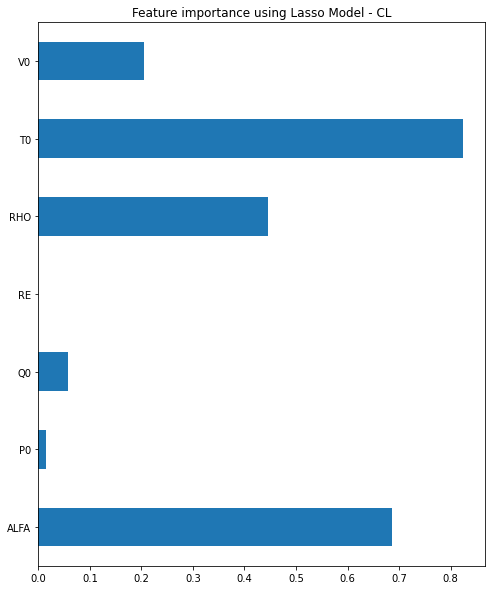

In [69]:
#EmbeddedMethod TEST CL
reg = LassoCV()
reg.fit(X, a)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,a))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CL")

In [70]:
 abs(imp_coef)

ALFA   0.69
P0     0.01
Q0     0.06
RE     0.00
RHO    0.45
T0     0.82
V0     0.20
dtype: float64

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.899423
Lasso picked 7 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using RidgeCV Model - CL')

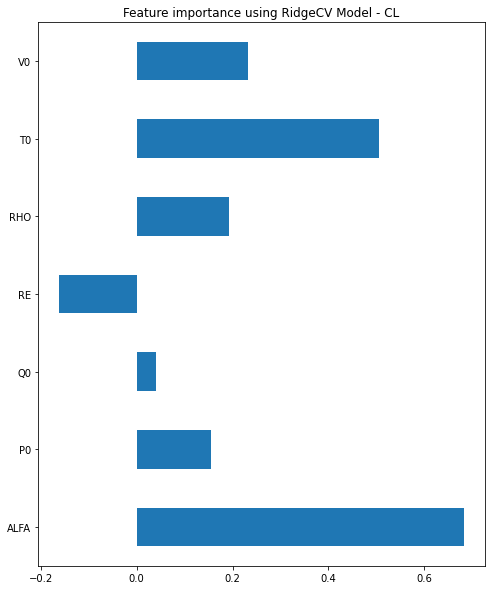

In [87]:
#EmbeddedMethod TEST CL
reg = RidgeCV()
reg.fit(X, a)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,a))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using RidgeCV Model - CL")

In [72]:
abs(imp_coef)

ALFA   0.68
P0     0.15
Q0     0.04
RE     0.16
RHO    0.19
T0     0.51
V0     0.23
dtype: float64

Best alpha using built-in LassoCV: 0.000050
Best score using built-in LassoCV: 0.587764
Lasso picked 6 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CD')

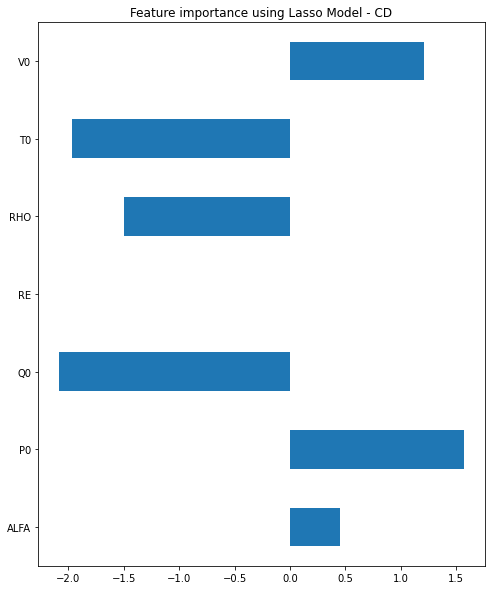

In [73]:
#EmbeddedMethod TEST CD
reg = LassoCV()
reg.fit(X, b)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CD")

In [74]:
abs(imp_coef)

ALFA   0.45
P0     1.57
Q0     2.09
RE     0.00
RHO    1.50
T0     1.97
V0     1.21
dtype: float64

In [88]:
#EmbeddedMethod TEST CD
reg = RidgeCV()
reg.fit(X, b)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.561407
Lasso picked 7 variables and eliminated the other 0 variables


ALFA   0.42
P0     0.74
Q0     0.65
RE     0.09
RHO    0.63
T0     0.42
V0     0.48
dtype: float64

Best alpha using built-in LassoCV: 0.007174
Best score using built-in LassoCV: 0.270583
Lasso picked 2 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CM25')

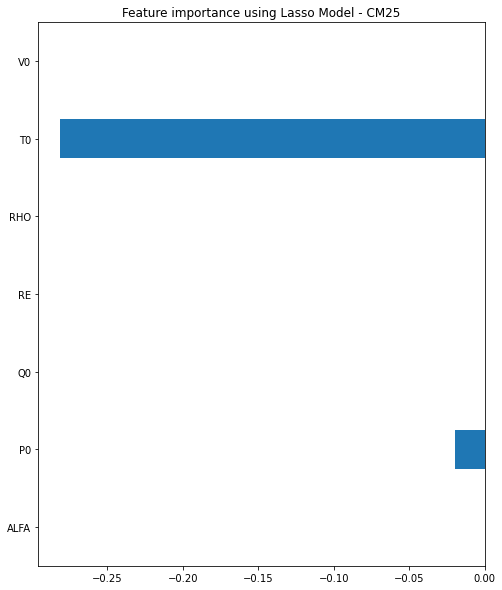

In [76]:
#EmbeddedMethod TEST CM25
reg = LassoCV()
reg.fit(X, c)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,c))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CM25")

In [ ]:
abs(imp_coef)

ALFA   0.00
P0     0.02
Q0     0.00
RE     0.00
RHO    0.00
T0     0.28
V0     0.00
dtype: float64

In [89]:
#EmbeddedMethod TEST CM25
reg = RidgeCV()
reg.fit(X, c)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: -0.838910
Lasso picked 7 variables and eliminated the other 0 variables


ALFA   0.02
P0     0.21
Q0     0.08
RE     0.32
RHO    0.28
T0     0.40
V0     0.24
dtype: float64

Best alpha using built-in LassoCV: 0.001994
Best score using built-in LassoCV: 0.143016
Lasso picked 3 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CYAW')

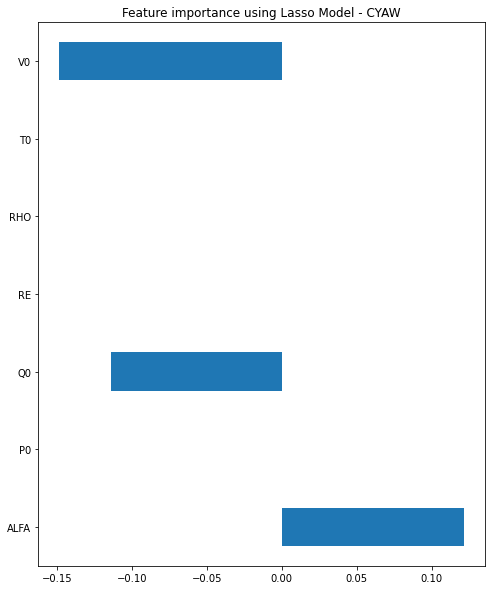

In [78]:
#EmbeddedMethod TEST CYAW
reg = LassoCV()
reg.fit(X, d)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,d))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CYAW")

In [79]:
abs(imp_coef)

ALFA   0.12
P0     0.00
Q0     0.11
RE     0.00
RHO    0.00
T0     0.00
V0     0.15
dtype: float64

In [90]:
#EmbeddedMethod TEST CYAW
reg = RidgeCV()
reg.fit(X, d)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: -0.037026
Lasso picked 7 variables and eliminated the other 0 variables


ALFA   0.11
P0     0.02
Q0     0.17
RE     0.04
RHO    0.03
T0     0.02
V0     0.17
dtype: float64

Best alpha using built-in LassoCV: 0.007241
Best score using built-in LassoCV: 0.098017
Lasso picked 3 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CROLL')

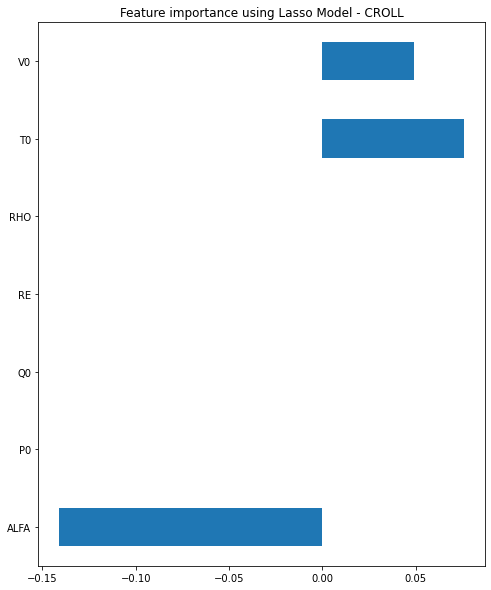

In [81]:
#EmbeddedMethod TEST CROLL
reg = LassoCV()
reg.fit(X, e)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,e))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CROLL")

In [82]:
abs(imp_coef)

ALFA   0.14
P0     0.00
Q0     0.00
RE     0.00
RHO    0.00
T0     0.08
V0     0.05
dtype: float64

In [91]:
#EmbeddedMethod TEST CROLL
reg = RidgeCV()
reg.fit(X, e)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: -0.421454
Lasso picked 7 variables and eliminated the other 0 variables


ALFA   0.23
P0     0.17
Q0     0.79
RE     0.05
RHO    0.15
T0     0.91
V0     0.14
dtype: float64

Best alpha using built-in LassoCV: 0.000920
Best score using built-in LassoCV: 0.679292
Lasso picked 4 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model - CY')

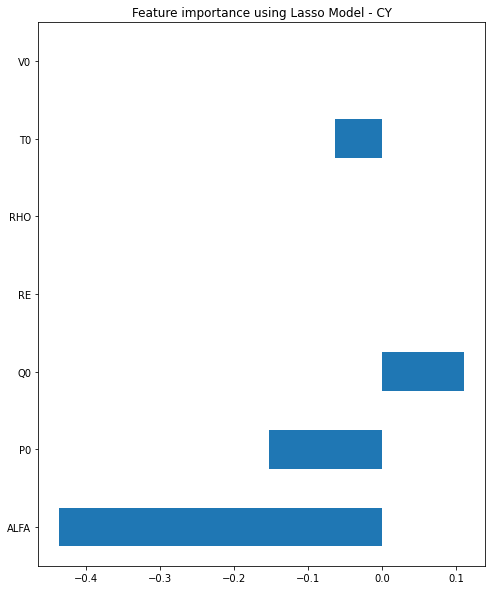

In [84]:
#EmbeddedMethod TEST CY
reg = LassoCV()
reg.fit(X, f)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,f))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model - CY")

In [ ]:
abs(imp_coef)

ALFA   0.44
P0     0.15
Q0     0.11
RE     0.00
RHO    0.00
T0     0.06
V0     0.00
dtype: float64

In [92]:
#EmbeddedMethod TEST CY
reg = RidgeCV()
reg.fit(X, f)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)
print("Best score using built-in RidgeCV: %f" %reg.score(X,b))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_index()
abs(imp_coef)

Best alpha using built-in RidgeCV: 1.000000
Best score using built-in RidgeCV: -1.386501
Lasso picked 7 variables and eliminated the other 0 variables


ALFA   0.40
P0     0.16
Q0     0.07
RE     0.06
RHO    0.01
T0     0.08
V0     0.07
dtype: float64